Task4_0603. train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요.

In [ ]:
from google.colab import files
file_uploaded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
file_path='train.csv'
df=pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. 결측치 확인 및 불필요 변수 삭제

In [ ]:
# 결측치 확인 및 불필요 변수 삭제
# 1-1. 결측치 확인
print(df.isnull().sum())
    # age 177 - 수정 필요
    # cabin - 변수 삭제 대상
    # embarked - 변수 삭제 대상

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# 1-2. 분석에 불필요한 데이터 열 삭제
df.drop(columns=['Ticket', 'Cabin','Embarked'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


## 2. 결측치 처리 (Age)

In [ ]:
# 2-1. Age 결측치 채우기 위해 정보 확인
print("<< Age Info >> \n", df['Age'].describe())

<< Age Info >> 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
# 2-2. Age 결측치 처리를 위해 "Name"에서 title 구분하여 별도 열에 추가
df['Name'].unique() # 구성 : firstname , title . 기타 호칭
df1=df['Name'].str.split(" ", expand=True).head() # Name에서 title만 따로 빼서 열 저장

In [ ]:
# 따로 뽑은 title을 작업 데이터에 붙이기
df['Title']=df1[1]

In [ ]:
df['Title'].fillna('Unknown', inplace=True) # title 없는 케이스는 "unknown" 처리

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr.
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Unknown
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Unknown


In [ ]:
# 2-3. 결측치 처리 기준 정리 :

# Title, sex 기준으로 age 결측치 처리 기준
# sex 기준 age mean:
print("<< sex 기준 age mean >> \n", df.groupby('Sex')['Age'].mean())

# title 기준 age mean:
print("\n<< title 기준 age mean >> \n", df.groupby('Title')['Age'].mean())

# title이 unknown인 경우에는 sex 기준으로 mean값 넣어주기

<< sex 기준 age mean >> 
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<< title 기준 age mean >> 
 Title
Miss.      26.000000
Mr.        28.500000
Mrs.       36.500000
Unknown    29.688533
Name: Age, dtype: float64


In [88]:
# 원본카피
df1=df.copy()

In [89]:
# 2-4. age 결측치 처리:
age_null_mask=df['Age'].isnull()

df1.loc[age_null_mask & (df1['Title']=='Miss.'), 'Age']=26.0
df1.loc[age_null_mask & (df1['Title']=='Mr.'), 'Age']=28.0
df1.loc[age_null_mask & (df1['Title']=='Mrs.'), 'Age']=36.0
df1.loc[age_null_mask & (df1['Title']=='Unknown') & (df1['Sex']=='female'), 'Age']=27.9
df1.loc[age_null_mask & (df1['Title']=='Unknown') & (df1['Sex']=='male'), 'Age']=30.7

In [90]:
# 결측치 처리 완료 확인 :
print(df1.isnull().sum()) # 위에서 처리한 값이 의도대로 들어갔는지는 어떻게 확인하는게 효율적인지?

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
dtype: int64


### 3. 데이터 수정/범주형 변수 생성

In [ ]:
# 3. 데이터 수정/범위 잡기
# sibsp, parch를 하나로 합치고
# age group 생성
# fare group 생성

In [91]:
# 3-1. sibsp, parch를 하나로 합치기
df1['Family_num']=df1['SibSp']+df1['Parch']+1 # 본인 포함시키기 위해

In [92]:
# 3-2. age group 만들기
bins=[0,5,12,19,30,40,50,60,100]
labels=['Infant','Child','Teenager','20s','30s','40s','50s','60s or above']
df1['Age_group']=pd.cut(df1['Age'],bins=bins, labels=labels)

In [93]:
# 3-3. fare group 만들기
print(df1['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


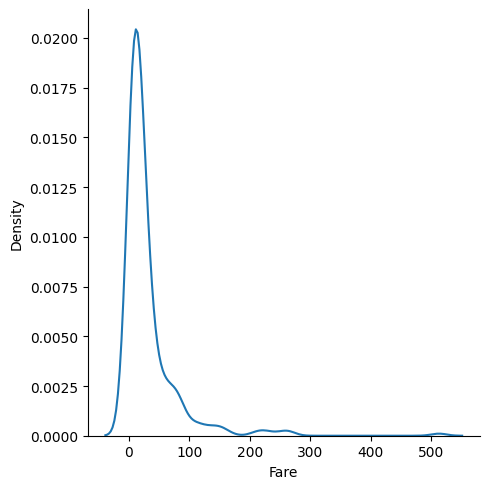

In [94]:
# seaborn으로 분포도 그래프로 fare 확인
import seaborn as sns
sns.displot(data=df1,x='Fare',kind='kde')

In [110]:
# fare group 생성 코드
fare_bins=[0,7.9,14.5,31.0,600]
fare_labels=['Low','Low_medium','Medium-high','High']
df1['Fare_group']=pd.cut(df1['Fare'], bins=fare_bins, labels=fare_labels, right=False)
# fare==0.0 인 15명 때문에 좌측 edge 값 포함하기 위해 right=False 넣어줌

In [138]:
df1['Fare_group'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare_group
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.2 KB


In [146]:
# Fare_group에 결측치 확인
df1[df1.Fare_group.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Family_num,Age_group,Fare_group


### 4. 최종 데이터 정리

In [147]:
# FINAL DATASET 정리. 불필요 변수 삭제
df1_F=df1.copy()
df1_F.drop(columns=['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare','Title'],inplace=True)

In [148]:
df1_F

,Survived,Sex,Family_num,Age_group,Fare_group
0,0,male,2,20s,Low
1,1,female,2,30s,High
2,1,female,1,20s,Low_medium
3,1,female,2,30s,High
4,0,male,1,30s,Low_medium
...,...,...,...,...,...
886,0,male,1,20s,Low_medium
887,1,female,1,Teenager,Medium-high
888,0,female,4,20s,Medium-high
889,1,male,1,20s,Medium-high


In [149]:
df1_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Sex         891 non-null    object  
 2   Family_num  891 non-null    int64   
 3   Age_group   891 non-null    category
 4   Fare_group  891 non-null    category
dtypes: category(2), int64(2), object(1)
memory usage: 23.3+ KB


In [150]:
df1_F['Fare_group'].unique()

['Low', 'High', 'Low_medium', 'Medium-high']
Categories (4, object): ['Low' < 'Low_medium' < 'Medium-high' < 'High']

In [151]:
# 범주형 변수를 더미 변수로 변환할 열 목록
# 범주형 변수로 변환하는 이유는 회귀분석이나 머신러닝에 사용하기 위해 범주형을 수치로 만들어줘야해서임
categorical_columns=['Sex','Age_group','Fare_group']

# 반복문으로 범주혀여 변수를 더미 변수로 변환
for column in categorical_columns:
    df1_F=pd.get_dummies(df1_F, columns=[column],drop_first=False) # <== drop_first=False 를 해야지 Fare_group의 'low' 열이 사라지지 않음

In [152]:
df1_F

,Survived,Family_num,Sex_female,Sex_male,Age_group_Infant,Age_group_Child,Age_group_Teenager,Age_group_20s,Age_group_30s,Age_group_40s,Age_group_50s,Age_group_60s or above,Fare_group_Low,Fare_group_Low_medium,Fare_group_Medium-high,Fare_group_High
0,0,2,False,True,False,False,False,True,False,False,False,False,True,False,False,False
1,1,2,True,False,False,False,False,False,True,False,False,False,False,False,False,True
2,1,1,True,False,False,False,False,True,False,False,False,False,False,True,False,False
3,1,2,True,False,False,False,False,False,True,False,False,False,False,False,False,True
4,0,1,False,True,False,False,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,False,True,False,False,False,True,False,False,False,False,False,True,False,False
887,1,1,True,False,False,False,True,False,False,False,False,False,False,False,True,False
888,0,4,True,False,False,False,False,True,False,False,False,False,False,False,True,False
889,1,1,False,True,False,False,False,True,False,False,False,False,False,False,True,False


### 5. 모델링

In [153]:
# 타겟 변수와 피처 변수 설정
X = df1_F.drop('Survived', axis=1)
y = df1_F['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred)) # 예측 정확도 (잘하면 정확도 0.85 정도까지는 나옴.)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 15) (179, 15) (712,) (179,)
Accuracy: 0.7932960893854749
Confusion Matrix:
 [[92 13]
 [24 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

